## CORRELATION BETWEEN EACH SENSORS

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg
from random import random
from copy import deepcopy
from scipy.linalg import hankel, eigh
from matplotlib import style
from matplotlib.patches import Ellipse
import seaborn as sns

In [2]:
train_data=np.load('traindata_ss.npy',allow_pickle=True)

In [3]:
df_a=pd.read_csv('WADI_attackdataLABELED.csv')
df_a=df_a.iloc[:,3:]
sensors = list(df_a.columns)

In [4]:
df = pd.DataFrame(train_data[0],columns=sensors)
for i in range(1,len(train_data)):
    df = pd.concat([df,pd.DataFrame(train_data[i],columns=sensors)],axis=0)
df

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
0,167.892,0.625471,11.6175,504.140,0.293168,0.001107,0.0,0.0,62.1436,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,60.0435,1.0,0.11,1.0
1,167.892,0.625471,11.6175,504.140,0.293168,0.001107,0.0,0.0,62.1436,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,60.0435,1.0,0.11,1.0
2,167.892,0.625471,11.6175,504.140,0.293168,0.001107,0.0,0.0,62.1436,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,60.0435,1.0,0.11,1.0
3,167.892,0.625471,11.6175,504.140,0.293168,0.001107,0.0,0.0,62.1436,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,60.0435,1.0,0.11,1.0
4,167.895,0.619473,11.6179,504.145,0.293009,0.001080,0.0,0.0,62.1472,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,60.1557,1.0,0.11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,179.618,0.625473,11.9156,420.420,0.228225,1.903020,0.0,0.0,43.3472,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,86.5871,1.0,1.47,-1.0
3596,179.618,0.625473,11.9156,420.420,0.228225,1.903020,0.0,0.0,43.3472,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,86.5871,1.0,1.47,-1.0
3597,179.618,0.625473,11.9156,420.420,0.228225,1.903020,0.0,0.0,43.3472,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,86.5871,1.0,1.47,-1.0
3598,179.618,0.625473,11.9156,420.420,0.228225,1.903020,0.0,0.0,43.3472,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,86.5871,1.0,1.47,-1.0


In [5]:
cols_to_delete=[6, 7, 14, 16, 68, 69, 71, 72, 74, 84, 87, 91, 92, 93, 94, 95, 96, 111, 113, 114, 115, 116, 117, 118, 119, 121]
df = df.drop(columns=df.columns[cols_to_delete])

In [6]:
sensor_label_corr = []
for sensor in df.columns:
    if sensor != 'Attack LABLE (1:No Attack, -1:Attack)':
        temp = df[sensor].corr(df['Attack LABLE (1:No Attack, -1:Attack)'])
        sensor_label_corr.append([temp,sensor])
sensor_label_corr.sort(reverse=True, key = lambda x : abs(x[0]))
sensor_label_corr

[[-0.3465103829163665, '1_MV_003_STATUS'],
 [-0.34648944222127515, '1_MV_002_STATUS'],
 [-0.34152490570416727, '2_MCV_007_CO'],
 [-0.2455433906436699, '1_AIT_002_PV'],
 [0.22324204165473563, '2_PIT_001_PV'],
 [0.15625483335754142, '1_AIT_004_PV'],
 [0.14824157776377578, '2A_AIT_004_PV'],
 [0.1450275098178088, '2B_AIT_004_PV'],
 [-0.12685640449913496, '1_AIT_001_PV'],
 [0.1167344656663146, '2_LT_002_PV'],
 [-0.11306333381185119, '2_FIC_501_SP'],
 [-0.11243324747225084, 'TOTAL_CONS_REQUIRED_FLOW'],
 [-0.10835967972839619, '1_AIT_003_PV'],
 [0.10079075247895267, '2_PIT_002_PV'],
 [-0.09553811636437749, '2_FIC_401_SP'],
 [-0.09196044192736809, '1_P_001_STATUS'],
 [-0.0918774684441162, '2_MCV_301_CO'],
 [-0.09169252300221988, '1_FIT_001_PV'],
 [-0.09118285837954249, '1_P_003_STATUS'],
 [-0.090846873662204, '1_P_006_STATUS'],
 [0.0891660758827838, '2_DPIT_001_PV'],
 [-0.07800017766727435, '2B_AIT_002_PV'],
 [-0.07078831129144841, '2_MCV_401_CO'],
 [-0.06938593146289637, '2_MCV_201_CO'],
 [-0

In [7]:
df_normal = df[df['Attack LABLE (1:No Attack, -1:Attack)']==1]
df_normal = df_normal.drop(columns='Attack LABLE (1:No Attack, -1:Attack)')
df_normal

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
0,167.892,0.625471,11.6175,504.140,0.293168,0.001107,62.1436,1.0,1.0,1.0,...,482.191,0.0,8279.1,14.35530,238.111,0.620147,0.667695,67.0974,60.0435,0.11
1,167.892,0.625471,11.6175,504.140,0.293168,0.001107,62.1436,1.0,1.0,1.0,...,482.191,0.0,8279.1,14.35530,238.111,0.620147,0.667695,67.0974,60.0435,0.11
2,167.892,0.625471,11.6175,504.140,0.293168,0.001107,62.1436,1.0,1.0,1.0,...,482.248,0.0,8279.1,14.35530,238.111,0.620147,0.667695,67.0974,60.0435,0.11
3,167.892,0.625471,11.6175,504.140,0.293168,0.001107,62.1436,1.0,1.0,1.0,...,482.248,0.0,8279.1,14.35530,238.111,0.620147,0.667695,67.0974,60.0435,0.11
4,167.895,0.619473,11.6179,504.145,0.293009,0.001080,62.1472,1.0,1.0,1.0,...,482.248,0.0,8279.1,14.00090,264.802,0.620240,0.672394,67.1004,60.1557,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,179.491,0.631472,11.9234,420.706,0.228469,1.899090,42.5462,2.0,1.0,1.0,...,466.278,0.0,8279.1,7.05323,690.042,0.516764,0.001354,64.3759,68.7421,1.56
3539,179.491,0.631472,11.9234,420.706,0.228469,1.899090,42.5462,2.0,1.0,1.0,...,466.278,0.0,8279.1,7.05323,690.042,0.516764,0.001354,64.3759,68.7421,1.56
3540,179.491,0.631472,11.9234,420.706,0.228469,1.899090,42.5462,2.0,1.0,1.0,...,466.278,0.0,8279.1,7.05323,690.042,0.516764,0.001354,64.3759,68.7421,1.56
3541,179.491,0.631472,11.9234,420.706,0.228469,1.899090,42.5462,2.0,1.0,1.0,...,466.278,0.0,8279.1,7.05323,690.042,0.516764,0.001354,64.3759,68.7421,1.56


In [8]:
df_attack = df[df['Attack LABLE (1:No Attack, -1:Attack)']==-1]
df_attack = df_attack.drop(columns='Attack LABLE (1:No Attack, -1:Attack)')
df_attack

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
1503,167.005,0.613474,11.9575,467.477,0.293415,0.000870,44.9750,1.0,1.0,1.0,...,474.401,0.0,8279.1,7.33387,633.337,0.491560,0.001369,64.4316,63.2852,0.69
1504,167.005,0.613474,11.9575,467.477,0.293415,0.000870,44.9750,1.0,1.0,1.0,...,474.401,0.0,8279.1,7.33387,633.337,0.491560,0.001369,64.4316,63.2852,0.69
1505,167.005,0.613474,11.9575,467.477,0.293415,0.000870,44.9750,1.0,1.0,1.0,...,474.401,0.0,8279.1,7.33387,633.337,0.491560,0.001369,64.4316,63.2852,0.69
1506,166.965,0.619474,11.9573,467.522,0.293185,0.001254,45.1677,1.0,1.0,1.0,...,474.401,0.0,8279.1,7.26840,638.484,0.491449,0.001392,64.3614,63.5099,0.69
1507,166.965,0.619474,11.9573,467.522,0.293185,0.001254,45.1677,1.0,1.0,1.0,...,474.401,0.0,8279.1,7.26840,638.484,0.491449,0.001392,64.3614,63.5099,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,179.618,0.625473,11.9156,420.420,0.228225,1.903020,43.3472,2.0,1.0,1.0,...,468.168,0.0,8279.1,5.21471,783.722,0.536200,0.627771,64.5326,86.5871,1.47
3596,179.618,0.625473,11.9156,420.420,0.228225,1.903020,43.3472,2.0,1.0,1.0,...,468.168,0.0,8279.1,5.21471,783.722,0.536200,0.627771,64.5326,86.5871,1.47
3597,179.618,0.625473,11.9156,420.420,0.228225,1.903020,43.3472,2.0,1.0,1.0,...,468.168,0.0,8279.1,5.21471,783.722,0.536200,0.627771,64.5326,86.5871,1.47
3598,179.618,0.625473,11.9156,420.420,0.228225,1.903020,43.3472,2.0,1.0,1.0,...,468.068,0.0,8279.1,5.21471,783.722,0.536200,0.627771,64.5326,86.5871,1.47


In [9]:
corr_matrix_normal=df_normal.corr(method='pearson')
corr_matrix_normal

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
1_AIT_001_PV,1.000000,-0.036078,-0.360507,0.094972,-0.316300,0.061539,-0.023007,0.061494,0.006004,0.005670,...,0.380518,-0.024840,-0.050115,-0.107530,0.053002,-0.242619,-0.010172,0.067957,-0.024023,0.021912
1_AIT_002_PV,-0.036078,1.000000,0.082802,-0.178565,-0.234650,0.262039,-0.008486,0.258215,-0.002704,-0.002542,...,-0.026742,-0.071984,-0.159914,-0.034682,0.010084,-0.215300,-0.171954,-0.159540,0.065786,0.126064
1_AIT_003_PV,-0.360507,0.082802,1.000000,-0.393831,0.043245,0.028804,0.013054,0.029798,0.016178,0.015286,...,-0.513110,0.049420,0.190858,0.170260,-0.107712,0.271884,0.037135,-0.016176,0.004617,0.004498
1_AIT_004_PV,0.094972,-0.178565,-0.393831,1.000000,0.527993,-0.391325,-0.126366,-0.386033,-0.037047,-0.034976,...,0.521498,-0.044800,-0.124395,-0.092587,0.073024,-0.116200,0.055636,-0.000658,-0.138915,-0.307198
1_AIT_005_PV,-0.316300,-0.234650,0.043245,0.527993,1.000000,-0.505192,-0.289372,-0.498983,-0.021798,-0.020590,...,0.157308,0.059306,0.172888,0.106596,-0.060692,0.211546,0.131368,0.005851,-0.192435,-0.423998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_AIT_005_PV,-0.242619,-0.215300,0.271884,-0.116200,0.211546,-0.103238,0.048159,-0.101009,0.004987,0.005229,...,-0.081270,0.123862,0.621030,0.180925,-0.078131,1.000000,0.685282,0.370502,-0.093247,-0.137884
3_FIT_001_PV,-0.010172,-0.171954,0.037135,0.055636,0.131368,-0.175223,0.080294,-0.172942,-0.002562,-0.002069,...,-0.022149,0.061686,0.745272,0.132754,-0.039299,0.685282,1.000000,0.443238,-0.198324,-0.307924
3_LT_001_PV,0.067957,-0.159540,-0.016176,-0.000658,0.005851,-0.141794,0.105175,-0.139492,-0.008330,-0.007864,...,-0.024486,0.112820,0.280618,0.051583,-0.017009,0.370502,0.443238,1.000000,-0.173020,-0.308292
LEAK_DIFF_PRESSURE,-0.024023,0.065786,0.004617,-0.138915,-0.192435,0.239093,-0.102369,0.237474,0.034405,0.029808,...,0.008594,0.003570,-0.155535,-0.056554,0.033488,-0.093247,-0.198324,-0.173020,1.000000,0.541418


<AxesSubplot: >

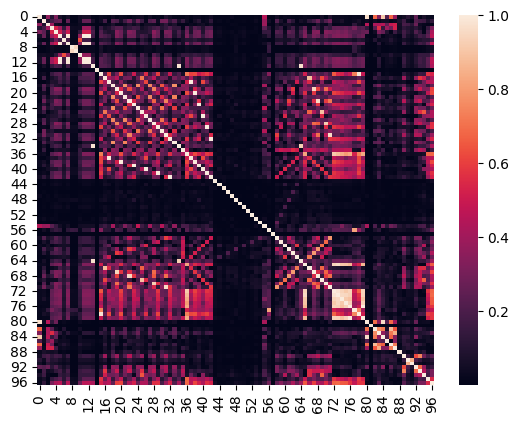

In [10]:
sns.heatmap(np.abs(corr_matrix_normal.to_numpy()))

In [11]:
corr_matrix_normal.isna().sum()

1_AIT_001_PV                0
1_AIT_002_PV                0
1_AIT_003_PV                0
1_AIT_004_PV                0
1_AIT_005_PV                0
                           ..
3_AIT_005_PV                0
3_FIT_001_PV                0
3_LT_001_PV                 0
LEAK_DIFF_PRESSURE          0
TOTAL_CONS_REQUIRED_FLOW    0
Length: 97, dtype: int64

In [12]:
X = df_attack.to_numpy()
X.shape

(8465, 97)

In [13]:
means = X.mean(axis=0)
means.shape

(97,)

In [14]:
M = X-means

In [15]:
S = np.matmul(M.T,M)

In [16]:
l = np.linalg.norm(M,axis=0)
l += 1e-3

In [17]:
for i in range(97):
    for j in range(97):
        S[i][j]/=l[i]
        S[i][j]/=l[j]

In [18]:
corr_matrix_attack = pd.DataFrame(S,columns=df_attack.columns,index=df_attack.columns)
corr_matrix_attack

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
1_AIT_001_PV,1.000000,-0.046657,0.095548,-0.041110,-0.152061,0.105084,0.088409,0.129482,0.387785,0.387785,...,0.084573,0.0,-5.011019e-19,0.029246,-0.006989,0.157302,0.125301,-0.070793,0.193119,0.175721
1_AIT_002_PV,-0.046657,0.999985,0.048107,0.174380,0.135941,-0.037024,-0.299872,0.028651,0.227950,0.227950,...,-0.307008,0.0,-8.965107e-20,0.150888,-0.109908,0.235177,0.217811,-0.125924,-0.179792,-0.142189
1_AIT_003_PV,0.095548,0.048107,0.999932,0.528494,-0.025015,0.081471,0.007871,0.061345,0.046665,0.046665,...,-0.012310,0.0,8.664024e-18,0.009227,-0.003360,0.064339,0.048456,-0.028441,0.025413,0.026155
1_AIT_004_PV,-0.041110,0.174380,0.528494,0.999999,0.806208,-0.448133,0.172013,-0.547475,-0.144230,-0.144230,...,-0.057150,0.0,-6.019940e-18,0.142289,-0.084154,0.263003,0.356852,0.316039,-0.263681,-0.584648
1_AIT_005_PV,-0.152061,0.135941,-0.025015,0.806208,0.999405,-0.586485,0.135440,-0.701773,-0.221542,-0.221542,...,0.012559,0.0,-4.181977e-18,0.181647,-0.109589,0.313711,0.441074,0.396894,-0.337900,-0.655505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_AIT_005_PV,0.157302,0.235177,0.064339,0.263003,0.313711,-0.192564,0.088365,-0.149750,0.325500,0.325500,...,-0.048177,0.0,-1.957704e-18,0.184433,-0.087538,0.999833,0.964409,0.306707,0.203162,-0.217770
3_FIT_001_PV,0.125301,0.217811,0.048456,0.356852,0.441074,-0.312405,0.109994,-0.274967,0.246143,0.246143,...,-0.039970,0.0,4.045641e-19,0.206358,-0.102383,0.964409,0.999928,0.415544,0.144608,-0.338152
3_LT_001_PV,-0.070793,-0.125924,-0.028441,0.316039,0.396894,-0.698607,0.344109,-0.497353,-0.171603,-0.171603,...,-0.009484,0.0,2.258584e-17,0.122325,-0.061915,0.306707,0.415544,0.999981,-0.344515,-0.641872
LEAK_DIFF_PRESSURE,0.193119,-0.179792,0.025413,-0.263681,-0.337900,0.305636,-0.239727,0.309258,0.304313,0.304313,...,-0.068636,0.0,-6.528429e-19,-0.097136,0.073158,0.203162,0.144608,-0.344515,0.999997,0.467146


<AxesSubplot: >

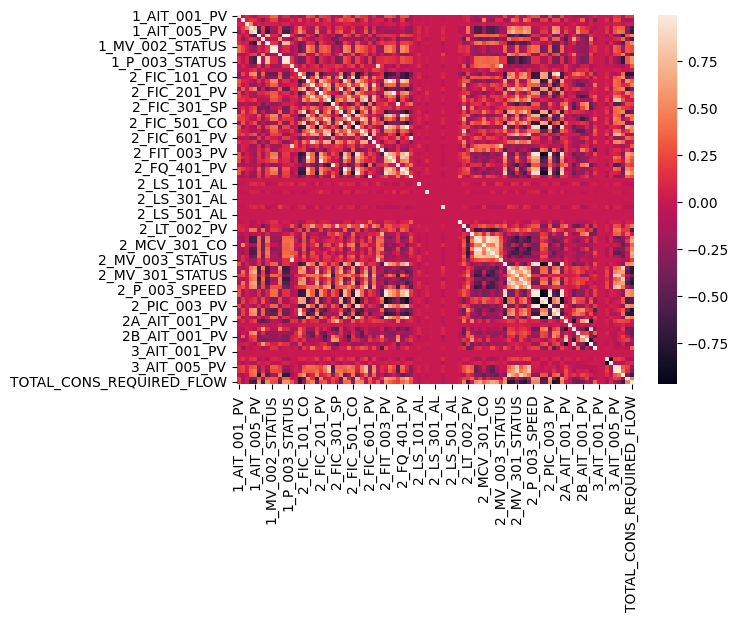

In [19]:
sns.heatmap(corr_matrix_attack)

In [20]:
corr_matrix_attack.isna().sum()

1_AIT_001_PV                0
1_AIT_002_PV                0
1_AIT_003_PV                0
1_AIT_004_PV                0
1_AIT_005_PV                0
                           ..
3_AIT_005_PV                0
3_FIT_001_PV                0
3_LT_001_PV                 0
LEAK_DIFF_PRESSURE          0
TOTAL_CONS_REQUIRED_FLOW    0
Length: 97, dtype: int64

In [21]:
delta_matrix = corr_matrix_normal-corr_matrix_attack
delta_matrix

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
1_AIT_001_PV,2.704166e-07,0.010579,-0.456055,1.360817e-01,-0.164240,-0.043545,-0.111416,-0.067988,-0.381781,-0.382115,...,0.295946,-0.024840,-0.050115,-0.136776,0.059991,-0.399922,-0.135474,0.138751,-0.217141,-0.153809
1_AIT_002_PV,1.057902e-02,0.000015,0.034695,-3.529452e-01,-0.370591,0.299063,0.291386,0.229564,-0.230654,-0.230492,...,0.280266,-0.071984,-0.159914,-0.185570,0.119991,-0.450477,-0.389765,-0.033616,0.245579,0.268254
1_AIT_003_PV,-4.560553e-01,0.034695,0.000068,-9.223260e-01,0.068260,-0.052666,0.005183,-0.031547,-0.030488,-0.031379,...,-0.500800,0.049420,0.190858,0.161032,-0.104352,0.207545,-0.011321,0.012265,-0.020795,-0.021656
1_AIT_004_PV,1.360817e-01,-0.352945,-0.922326,9.813035e-07,-0.278215,0.056808,-0.298379,0.161441,0.107182,0.109253,...,0.578648,-0.044800,-0.124395,-0.234876,0.157178,-0.379204,-0.301216,-0.316697,0.124766,0.277449
1_AIT_005_PV,-1.642398e-01,-0.370591,0.068260,-2.782150e-01,0.000595,0.081292,-0.424812,0.202790,0.199744,0.200952,...,0.144749,0.059306,0.172888,-0.075051,0.048898,-0.102166,-0.309706,-0.391043,0.145465,0.231507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_AIT_005_PV,-3.999217e-01,-0.450477,0.207545,-3.792035e-01,-0.102166,0.089326,-0.040206,0.048741,-0.320513,-0.320271,...,-0.033093,0.123862,0.621030,-0.003508,0.009407,0.000167,-0.279127,0.063795,-0.296409,0.079886
3_FIT_001_PV,-1.354735e-01,-0.389765,-0.011321,-3.012155e-01,-0.309706,0.137182,-0.029700,0.102025,-0.248705,-0.248212,...,0.017821,0.061686,0.745272,-0.073603,0.063084,-0.279127,0.000072,0.027693,-0.342933,0.030227
3_LT_001_PV,1.387508e-01,-0.033616,0.012265,-3.166968e-01,-0.391043,0.556813,-0.238934,0.357861,0.163273,0.163738,...,-0.015002,0.112820,0.280618,-0.070741,0.044906,0.063795,0.027693,0.000019,0.171495,0.333580
LEAK_DIFF_PRESSURE,-2.171415e-01,0.245579,-0.020795,1.247664e-01,0.145465,-0.066543,0.137358,-0.071785,-0.269908,-0.274505,...,0.077230,0.003570,-0.155535,0.040582,-0.039671,-0.296409,-0.342933,0.171495,0.000003,0.074271


<AxesSubplot: >

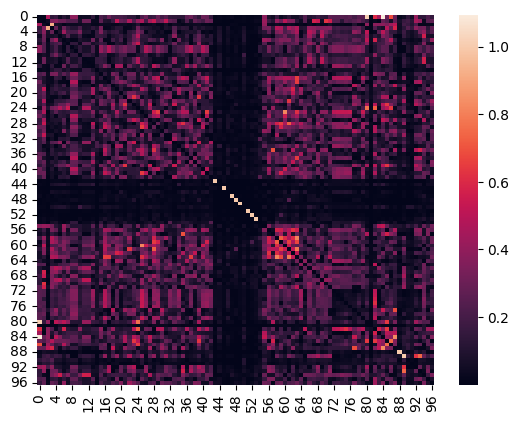

In [22]:
sns.heatmap(np.abs(delta_matrix.to_numpy()))

In [24]:
rank4 = delta_matrix.abs().sum()
rank4

1_AIT_001_PV                17.483467
1_AIT_002_PV                20.720576
1_AIT_003_PV                 7.264883
1_AIT_004_PV                16.910925
1_AIT_005_PV                15.773547
                              ...    
3_AIT_005_PV                15.084701
3_FIT_001_PV                15.173910
3_LT_001_PV                 17.139060
LEAK_DIFF_PRESSURE          12.012108
TOTAL_CONS_REQUIRED_FLOW    15.511232
Length: 97, dtype: float64

In [26]:
sorted(rank4,reverse=True)

[21.003124012812048,
 20.720575911399997,
 20.65238636288944,
 20.62567902562722,
 20.577417961440634,
 20.474722888579528,
 20.223944599884167,
 20.016319265094612,
 19.85981767028739,
 19.53827788797166,
 19.03365670414078,
 18.86290802998119,
 18.379820147341363,
 18.32918073602135,
 18.212889536858,
 18.200518450708834,
 18.06984914296485,
 17.970443445013363,
 17.958059737835015,
 17.76002103450956,
 17.671613366737855,
 17.48346730628306,
 17.13906007725549,
 17.108423744910233,
 16.954220532328268,
 16.910925419780714,
 16.830534074660672,
 16.658237914483767,
 16.505582026483932,
 16.470638331163023,
 16.44042055163361,
 16.344114709714393,
 16.337636151953014,
 16.248904437687226,
 16.216148242299315,
 16.100202901428784,
 15.888668016681297,
 15.881096397241267,
 15.870846409543859,
 15.773546659663873,
 15.769396820489364,
 15.735571221858772,
 15.727343500945807,
 15.599941694050425,
 15.59921259817884,
 15.562109770303543,
 15.51123165610211,
 15.490108731450738,
 15.40129